# Assignment 2 by: Ridge Tagala (s3934367)


In [2]:
# Replace "YourFullName" with your full name 
# Replace "YourStudentID" with your student ID (e.g. s1234567)

# Task 1: Regression


In [4]:
# Start from here to write your code for Task 1. 
# Please also feel free to add more cells in this ipynb file. 

## imports / setup

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [11]:
A2_filename = 'A2data.csv'

In [12]:
A2 = pd.read_csv(A2_filename, sep=';', decimal='.', header=None, names= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])

In [13]:
A2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
2,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
3,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


## training data

In [14]:
from sklearn.model_selection import train_test_split

In [13]:
A_train, A_test, d_train, d_test = train_test_split(A2.alcohol, A2.density, test_size=0.4, random_state=0)

In [14]:
A_train

4690     8.9
4044     8.5
1763    11.6
1713     9.6
1139    10.6
        ... 
1033    10.4
3264      12
1653    10.3
2607    10.2
2732     8.7
Name: alcohol, Length: 2869, dtype: object

In [15]:
A_train.shape

(2869,)

In [16]:
d_train

4690     0.9974
4044    0.99398
1763     0.9932
1713     0.9978
1139      0.992
         ...   
1033     0.9918
3264    0.98961
1653     0.9955
2607    0.99636
2732    0.99354
Name: density, Length: 2869, dtype: object

In [17]:
d_train.shape

(2869,)

In [18]:
A_test

3713       9
629      9.5
3239    12.7
4316     9.2
3782    11.1
        ... 
330       10
4449     9.1
1495    10.6
2087     9.1
3487    13.3
Name: alcohol, Length: 1913, dtype: object

In [19]:
A_test.shape

(1913,)

In [20]:
d_test

3713    0.99792
629      0.9969
3239    0.99097
4316    0.99804
3782     0.9912
         ...   
330       0.993
4449     0.9984
1495     0.9951
2087          1
3487    0.98947
Name: density, Length: 1913, dtype: object

In [21]:
d_test.shape

(1913,)

In [22]:
# cleaning data (removing columns with an empty value)

In [23]:
data_clean = A2[['alcohol', 'density']].dropna()

In [24]:
# choosing 200 random columns from 'alcohol' and 'density'

In [25]:
A2_sample_data = data_clean.sample(n=200, random_state=0)

In [26]:
print(A2_sample_data)

     alcohol  density
464      9.2    0.994
1650    11.4   0.9936
2632     8.7  0.99786
1116     9.1   0.9936
4496    11.3   0.9904
...      ...      ...
3202    11.5  0.99206
3879    11.2  0.99174
3933      13  0.99088
3151    12.3  0.98926
3994    10.4  0.99726

[200 rows x 2 columns]


In [27]:
A2_sample_data.to_csv('s3934367-A2SampleOne.csv', index=False)

In [28]:
print(A2_sample_data['alcohol'].dtype)
print(A2_sample_data['alcohol'].head())
print(A2_sample_data['density'].dtype)
print(A2_sample_data['density'].head())

object
464      9.2
1650    11.4
2632     8.7
1116     9.1
4496    11.3
Name: alcohol, dtype: object
object
464       0.994
1650     0.9936
2632    0.99786
1116     0.9936
4496     0.9904
Name: density, dtype: object


In [29]:
# create list of values for 'density' and 'alcohol'

In [30]:
Alcohol = [
    9.2, 11.4, 8.7, 9.1, 11.3, 9.8, 9.5, 9, 9, 10.4, 11.2, 10.8, 11.4, 9, 9.7, 10, 9, 8.9, 11.3, 9.1,
    10.1, 10.2, 12.2, 10.4, 11, 12, 12, 9.4, 12.5, 9.5, 10.5, 12.5, 10.5, 8.8, 12.3, 10.5, 12.5, 10.2,
    13, 10, 9.2, 12.4, 10.8, 11.2, 9.5, 8.8, 9.8, 9.7, 11.8, 13.8, 9.4, 9.1, 9.2, 12.2, 10, 9.4, 9, 
    8.6, 8.7, 9.3, 11.9, 9.2, 8.7, 8.6, 10.5, 9.2, 11.7, 10.7, 9, 11.3, 12.7, 10, 13, 10, 9.8, 11, 8.9,
    10.8, 11.4, 9.2, 10.5, 8.7, 9.5, 10.2, 12.2, 9, 12.5, 10.5, 9.1, 11.3, 9.2, 11.4, 12.1, 10.5, 10.2,
    10.8, 11.5, 12.4, 11.5, 10.1, 9.2, 10.2, 8.9, 11.5, 11, 9.5, 11.4, 10.1, 9.5, 10.4, 13.9, 9.7, 8.9, 
    9.6, 12.6, 11.9, 9.9, 10.6, 11, 9.9, 12, 13.7, 12.4, 9, 9.4, 9, 11, 11, 9.2, 9.4, 10.1, 10.6, 9.2, 
    11, 10.2, 11.5, 12.8, 12.1, 10.6, 9.4, 10.4, 9.4, 10.1, 10.2, 9, 10.1, 10.9, 10.5, 9.5, 9.9, 11.5,
    11.3, 9.6, 9.8, 9.5, 10, 11.8, 9, 9.3, 10.6, 9.4, 11.05, 11, 9.5, 11.5, 9.1, 9.4, 11.9, 9.9, 8.9,
    10, 9.5, 11, 10.9, 12, 13, 10.9, 12.3, 9.2, 10.9, 11.2, 9.2, 10.1, 9, 11.1, 9.8, 9.9, 11.6, 9.8, 
    9.8, 13.1, 9.5, 11.5, 9.5, 8.8, 11.5, 11.2, 13, 12.3, 10.4
]

In [31]:
Density = [
    0.994, 0.9936, 0.99786, 0.9936, 0.9904, 0.99699, 0.9958, 0.99773, 0.99772, 0.9926, 0.9904, 0.99365,
    0.99044, 0.9989, 0.9946, 0.9932, 0.9978, 0.9979, 0.9918, 0.99336, 0.9944, 0.99348, 0.99122, 0.99454,
    0.9914, 0.99193, 0.9924, 0.9948, 0.9888, 0.997, 0.99508, 0.9902, 0.99382, 0.99807, 0.99024, 0.99523,
    0.99151, 0.9928, 0.99, 0.99388, 1.00051, 0.9895, 0.9923, 0.99082, 0.9952, 0.99908, 0.99438, 0.9966,
    0.9923, 0.98889, 0.9954, 0.9983, 0.99804, 0.99021, 0.99243, 0.9993, 0.99792, 0.9999, 0.9976, 0.99545,
    0.9936, 0.9968, 1.0002, 0.9966, 0.99144, 0.99318, 0.98949, 0.9962, 0.9959, 0.99146, 0.9898, 0.9933,
    0.98919, 0.99383, 0.99232, 0.99096, 0.9961, 0.99402, 0.9914, 0.99344, 0.9918, 0.9936, 0.99784, 0.99166,
    0.98944, 0.9951, 0.9916, 0.99184, 0.99571, 0.99135, 0.9964, 0.9925, 0.99258, 0.99546, 0.995, 0.99299,
    0.9928, 0.98962, 0.99335, 0.9934, 0.9956, 0.99289, 0.99862, 0.99084, 0.9922, 0.9968, 0.99047, 0.9948,
    0.99551, 0.99587, 0.98936, 0.9952, 0.9986, 0.99767, 0.9896, 0.99004, 0.9968, 0.99246, 0.9966, 0.9939,
    0.9944, 0.9907, 0.98914, 0.99449, 0.9963, 0.99758, 0.9939, 0.99096, 0.9952, 0.99548, 0.99555, 0.9927,
    0.9989, 1.0001, 0.9942, 0.9928, 0.9895, 0.99254, 1.00295, 0.99552, 0.992, 0.9965, 0.9944, 0.99532,
    0.99625, 0.99352, 0.994, 0.9928, 0.99784, 0.9937, 0.9924, 0.99165, 0.9948, 0.99438, 0.99784, 0.99725,
    0.99035, 0.9951, 0.99658, 0.99397, 0.9933, 0.99043, 0.9924, 0.9969, 0.9947, 0.9986, 0.9974, 0.99093,
    0.9976, 0.9958, 0.992, 0.99402, 0.99268, 0.99406, 0.991, 0.98912, 0.9926, 0.98952, 0.9956, 0.9911,
    0.992, 0.99804, 0.99155, 0.9958, 0.99127, 0.9927, 0.9958, 0.9911, 0.99434, 0.9954, 0.98964, 0.9956,
    0.9912, 0.99542, 0.99924, 0.99206, 0.99174, 0.99088, 0.98926, 0.99726
]


In [32]:
# create dataframe for alcohol and density

In [33]:
A2_sample_data = pd.DataFrame({
    'alcohol': Alcohol,
    'density': Density
})

In [34]:
A2_sample_data['alcohol'] = A2_sample_data['alcohol'].astype(float)

In [35]:
A2_sample_data['densityl'] = A2_sample_data['density'].astype(float)

In [36]:
print(A2_sample_data['alcohol'].dtype)
print(A2_sample_data['alcohol'].head())
print(A2_sample_data['density'].dtype)
print(A2_sample_data['density'].head())

float64
0     9.2
1    11.4
2     8.7
3     9.1
4    11.3
Name: alcohol, dtype: float64
float64
0    0.99400
1    0.99360
2    0.99786
3    0.99360
4    0.99040
Name: density, dtype: float64


<Figure size 1400x800 with 0 Axes>

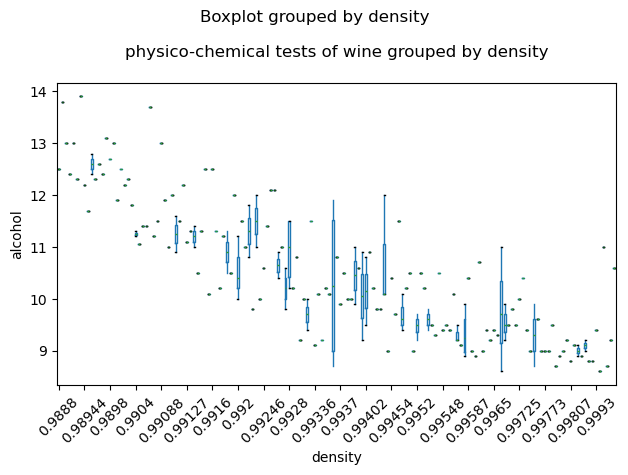

In [37]:
plt.figure(figsize=(14, 8))  # Increase figure size (for formatting)
A2_sample_data.boxplot(column = 'alcohol', by='density', grid = False) # boxplot generation
plt.title('physico-chemical tests of wine grouped by density\n') # title of graph
plt.ylabel('alcohol') # y-label
plt.xticks(ticks=plt.gca().get_xticks()[::7], rotation=45) 
plt.tight_layout()  # Automatically adjust layout to fit labels
plt.show() # show boxplot

## linear regression model 

In [39]:
A2_sample_data['alcohol'] = A2_sample_data['alcohol'].astype(float)

In [40]:
A2_sample_data['density'] = A2_sample_data['density'].astype(float)

In [41]:
A2_sample_data = pd.DataFrame({
    'alcohol': Alcohol,
    'density': Density
})

In [42]:
y = A2_sample_data['alcohol']
x1 = A2_sample_data['density']

In [43]:
# Perform linear regression on the new dataset
X_new = A2_sample_data[['density']].astype(float)  # Independent variable
y_new = A2_sample_data['alcohol'].astype(float)  # Dependent variable

# Fit the linear regression model with the new data
model_new = LinearRegression()
model_new.fit(X_new, y_new)

LinearRegression()

In [44]:
# Taken from Week 5 slides (page 22 /78)
# 1. choosing a model - question states a linear regression model such as Simple Linear Regression, 
# therefore this is the model i have chosen 
# 2. choose a loss function - quantifies prediction error (MSE / Mean Squared Error)
# 3. fit the model - determines the best parameters for the model given the data (y = a + bx)
# 4. evaluate performance - using RMSE / Root Mean Squared Error
                                                 

In [45]:
# Clean the data (ensure numeric values)
A2_sample_data['alcohol'] = pd.to_numeric(A2_sample_data['alcohol'], errors='coerce')
A2_sample_data['density'] = pd.to_numeric(A2_sample_data['density'], errors='coerce')
A2_sample_data = A2_sample_data.dropna(subset=['alcohol', 'density'])

In [46]:
print(A2_sample_data['alcohol'].dtype)
print(A2_sample_data['alcohol'].head())
print(A2_sample_data['density'].dtype)
print(A2_sample_data['density'].head())

float64
0     9.2
1    11.4
2     8.7
3     9.1
4    11.3
Name: alcohol, dtype: float64
float64
0    0.99400
1    0.99360
2    0.99786
3    0.99360
4    0.99040
Name: density, dtype: float64


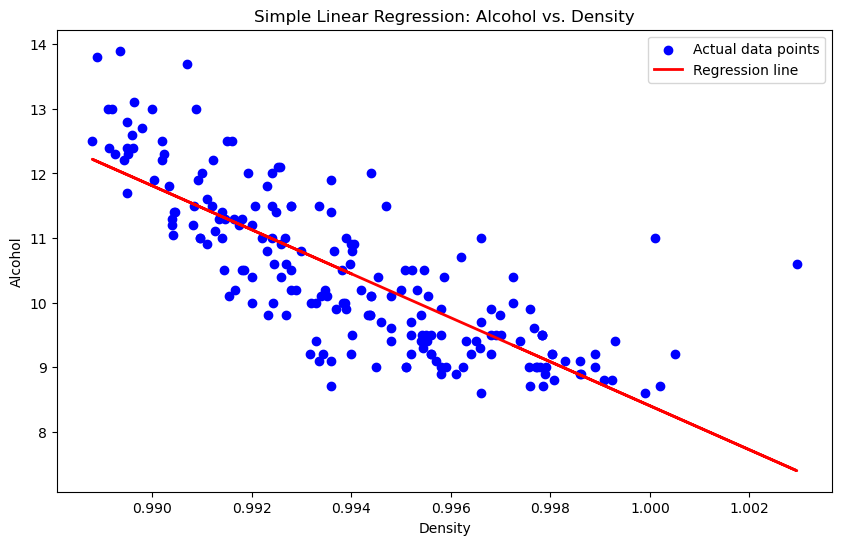

Intercept (a):  349.37
Coefficient (b): -340.97
Mean Squared Error (MSE):  0.58
Root Mean Squared Error (RMSE):  0.76


In [47]:
# Independent variable (X) and dependent variable (y)
X = A2_sample_data[['density']].values  # Reshape to 2D array
y = A2_sample_data['alcohol'].values

# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Get the parameters: intercept (a) and coefficient (b)
a = model.intercept_
b = model.coef_[0]

# Calculate the predictions (ŷ / y_pred) for the data points
y_pred = model.predict(X)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Plot the data points and the linear regression line
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data points
plt.scatter(X, y, color='blue', label='Actual data points')

# Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

# Add title and labels
plt.title('Simple Linear Regression: Alcohol vs. Density')
plt.xlabel('Density')
plt.ylabel('Alcohol')

# Show legend
plt.legend()

# Show the plot
plt.show()

# Print information
print(f"Intercept (a): {a: .2f}")
print(f"Coefficient (b): {b: .2f}")
print(f"Mean Squared Error (MSE): {mse: .2f}")
print(f"Root Mean Squared Error (RMSE): {rmse: .2f}")

# Task 2: Classification

In [49]:
# For each Task, you may choose to or not to use subsections.
# Feel free to add new subsections under any Task or delete/amend any subsections (e.g. kNN) in this template. 


## Setup

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [52]:
A2_filename = 'A2data.csv'

In [53]:
A2 = pd.read_csv(A2_filename, sep=';', decimal='.', header=None, names= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])

In [54]:
A2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
2,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
3,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


In [55]:
data2_clean = A2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']].dropna()

In [56]:
A2_sample_data = data2_clean.sample(n=500, random_state=0)

In [57]:
print(A2_sample_data)

     fixed acidity volatile acidity citric acid residual sugar chlorides  \
3543           7.6             0.38        0.28            4.2     0.029   
2076           6.7             0.24        0.33           12.3     0.046   
1384           6.3             0.39        0.24            6.9     0.069   
4153           7.5             0.38        0.56            9.7     0.055   
868            7.4             0.26        0.43              6     0.022   
...            ...              ...         ...            ...       ...   
3367           7.4             0.29        0.28           10.2     0.032   
3717           7.4             0.27        0.28            1.8      0.04   
2199             7             0.22        0.32            1.6     0.045   
1467           6.5             0.26        0.74           13.3     0.044   
4537           6.1             0.44        0.28           4.25     0.032   

     free sulfur dioxide total sulfur dioxide  density    pH sulphates  \
3543         

In [58]:
A2_sample_data.to_csv('s3934367-A2SampleTwo.csv', index=False)

## Setup of file + data validation

In [60]:
# Implement a kNN (k-Nearest Neighbours) classifier. Choose an appropriate value of k and justify
# your choice (in the report). Evaluate the classifier using appropriate metrics.
# Propose a method to modify kNN for better performance

In [61]:
import pandas as pd

# Load the dataset from the CSV file
A2_sample_data = pd.read_csv('s3934367-A2SampleTwo.csv')

In [62]:
# Display the first few rows of the dataset
A2_sample_data.head() # show data 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.6,0.38,0.28,4.2,0.029,7.0,112.0,0.99060,3.00,0.41,12.6,6
1,6.7,0.24,0.33,12.3,0.046,31.0,145.0,0.99830,3.36,0.40,9.5,5
2,6.3,0.39,0.24,6.9,0.069,9.0,117.0,0.99420,3.15,0.35,10.2,4
3,7.5,0.38,0.56,9.7,0.055,15.0,170.0,0.99605,3.13,0.65,9.9,6
4,7.4,0.26,0.43,6.0,0.022,22.0,125.0,0.99280,3.13,0.55,11.5,6


In [63]:
# double check
print(A2_sample_data['alcohol'].dtype)
print(A2_sample_data['alcohol'].head())
print(A2_sample_data['density'].dtype)
print(A2_sample_data['density'].head())

float64
0    12.6
1     9.5
2    10.2
3     9.9
4    11.5
Name: alcohol, dtype: float64
float64
0    0.99060
1    0.99830
2    0.99420
3    0.99605
4    0.99280
Name: density, dtype: float64


In [64]:
# get data from .csv file and drop invalid/empty columns (clean data)
data2_clean = A2_sample_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']].dropna()

In [65]:
# choose 500 random data sets from csv file 
A2_sample_data = data2_clean.sample(n=500, random_state=0)

In [66]:
data2_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.6,0.38,0.28,4.2,0.029,7.0,112.0,0.99060,3.00,0.41,12.6,6
1,6.7,0.24,0.33,12.3,0.046,31.0,145.0,0.99830,3.36,0.40,9.5,5
2,6.3,0.39,0.24,6.9,0.069,9.0,117.0,0.99420,3.15,0.35,10.2,4
3,7.5,0.38,0.56,9.7,0.055,15.0,170.0,0.99605,3.13,0.65,9.9,6
4,7.4,0.26,0.43,6.0,0.022,22.0,125.0,0.99280,3.13,0.55,11.5,6


# generate kNN classifier

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np
import pylab as plt

In [69]:
# Check the shape of the feature data (excluding the target column)
X = data2_clean.iloc[:, :-1]  # All columns except the last one, which is 'quality'
y = data2_clean['quality']  # The target variable is 'quality'

# Output the shapes
X_shape = X.shape
y_shape = y.shape

X_shape, y_shape

((500, 11), (500,))

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
knn = KNeighborsClassifier(3)

In [72]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
y_pred = knn.predict(X_test)

In [74]:
cm = confusion_matrix(y_test, y_pred)

Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.09      0.17      0.12         6
           5       0.27      0.33      0.30        27
           6       0.47      0.36      0.41        47
           7       0.32      0.33      0.32        18
           8       0.00      0.00      0.00         2

    accuracy                           0.33       100
   macro avg       0.19      0.20      0.19       100
weighted avg       0.36      0.33      0.34       100



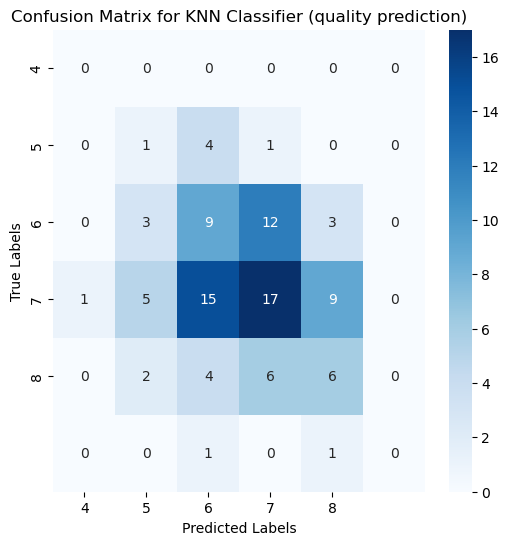

In [75]:
# Plot the confusion matrix (visual)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Classifier (quality prediction)')

# After fitting and predicting, add the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

In [76]:
confusion_matrix(y_test, y_pred) # plot confusion matrix in array 

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  4,  1,  0,  0],
       [ 0,  3,  9, 12,  3,  0],
       [ 1,  5, 15, 17,  9,  0],
       [ 0,  2,  4,  6,  6,  0],
       [ 0,  0,  1,  0,  1,  0]], dtype=int64)

# cross validation of k = 3, with split = 5

In [78]:
# k = 3, split = 5
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

# Load the dataset
data2_clean = pd.read_csv('s3934367-A2SampleTwo.csv')

# Prepare features (X) and target (y)
X = data2_clean.iloc[:, :-1].values  # All columns except the last one
y = data2_clean['quality'].values  # Target variable

# Initialize the kNN classifier with a chosen k value (e.g., k=5)
knn = KNeighborsClassifier(n_neighbors=3)

# Set up k-fold cross-validation with 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation and calculate accuracy for each fold
cv_scores = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy')

# Output the cross-validation scores for each fold and the mean accuracy
print("Cross-validation scores for each fold: ", cv_scores)
print("Mean cross-validation accuracy: ", cv_scores.mean())

Cross-validation scores for each fold:  [0.35 0.35 0.32 0.33 0.33]
Mean cross-validation accuracy:  0.336


## comparison (box plot) of chosen k value (k = 5) vs grid search k value (k = 10)

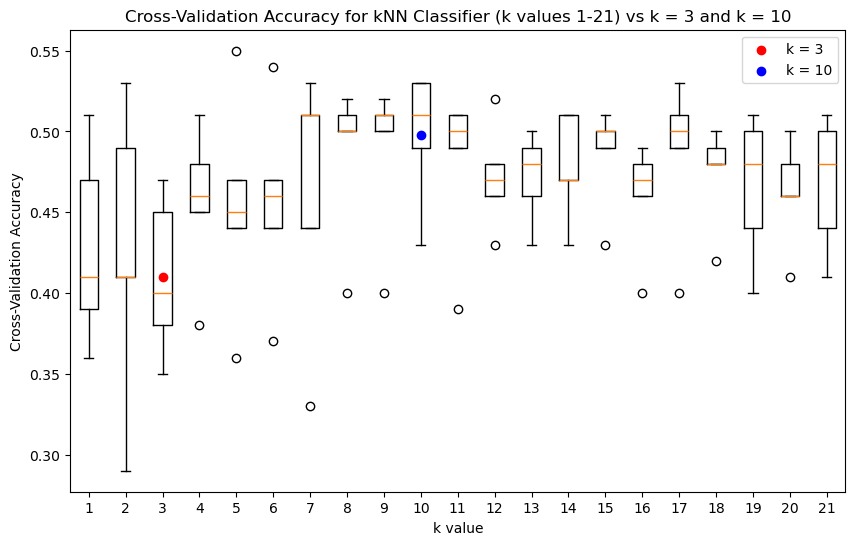

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('s3934367-A2SampleTwo.csv')

# Prepare features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except the last one
y = data['quality'].values  # Target variable

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prepare k-fold cross-validation with 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Create a list to store cross-validation scores for different k values
k_values = list(range(1, 22))  # k values from 1 to 21
cv_scores_list = []

# Perform cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_scaled, y, cv=kfold, scoring='accuracy')
    cv_scores_list.append(cv_scores)

# Perform cross-validation for k = 3 separately
knn_k3 = KNeighborsClassifier(n_neighbors=3)
cv_scores_k3 = cross_val_score(knn_k3, X_scaled, y, cv=kfold, scoring='accuracy')

# Perform cross-validation for k = 10 separately
knn_k10 = KNeighborsClassifier(n_neighbors=10)
cv_scores_k10 = cross_val_score(knn_k10, X_scaled, y, cv=kfold, scoring='accuracy')

# Create a box plot of cross-validation scores for different k values, highlighting k = 3 and k = 10
plt.figure(figsize=(10, 6))

# Boxplot for k values from 1 to 21
plt.boxplot(cv_scores_list, labels=k_values)

# Highlight k=3 cross-validation scores
plt.scatter([3], [cv_scores_k3.mean()], color='red', label='k = 3')

# Highlight k=10 cross-validation scores
plt.scatter([10], [cv_scores_k10.mean()], color='blue', label='k = 10')

plt.xlabel('k value')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for kNN Classifier (k values 1-21) vs k = 3 and k = 10')
plt.legend()
plt.show()

## modified kNN 

# PCA kNN algorithm

Confusion Matrix:
 [[ 0  0  0  0  0  0]
 [ 0  0  3  1  2  0]
 [ 1  3 12  9  2  0]
 [ 0  2 20 19  5  1]
 [ 0  1  7  7  2  1]
 [ 0  0  0  0  2  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.29      0.44      0.35        27
           6       0.53      0.40      0.46        47
           7       0.15      0.11      0.13        18
           8       0.00      0.00      0.00         2

    accuracy                           0.33       100
   macro avg       0.16      0.16      0.16       100
weighted avg       0.35      0.33      0.33       100



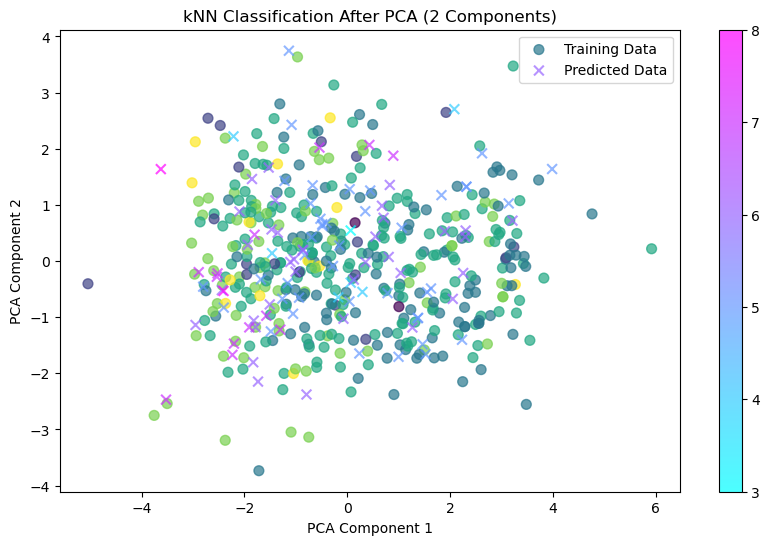

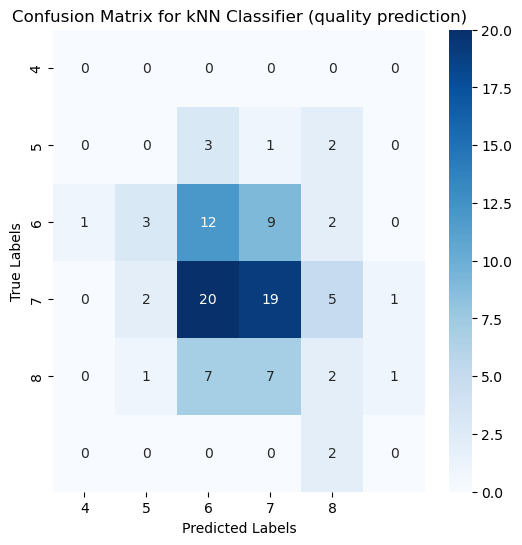

In [83]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('s3934367-A2SampleTwo.csv')

# Prepare features (X) and target (y)
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 
          'sulphates', 'alcohol']].values  # All features except 'quality'
y = data['quality'].values  # Target variable

# improve performance of PCA via standardisation 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)  # Reduce to 2 components for visualization purposes
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune the k value
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the classifier
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Plot the PCA-transformed data and the clusters formed by kNN
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.7, label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='cool', s=50, alpha=0.7, marker='x', label='Predicted Data')
plt.title("kNN Classification After PCA (2 Components)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.colorbar()
plt.show()

# confusion matrix (visual demonstration) 
cm = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for kNN Classifier (quality prediction)')
plt.show()

In [84]:
# grid search to find optimal K-value for kNN 
# modified k value for best performance 
# k-fold

C:\Users\Ridge\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best k value: 18


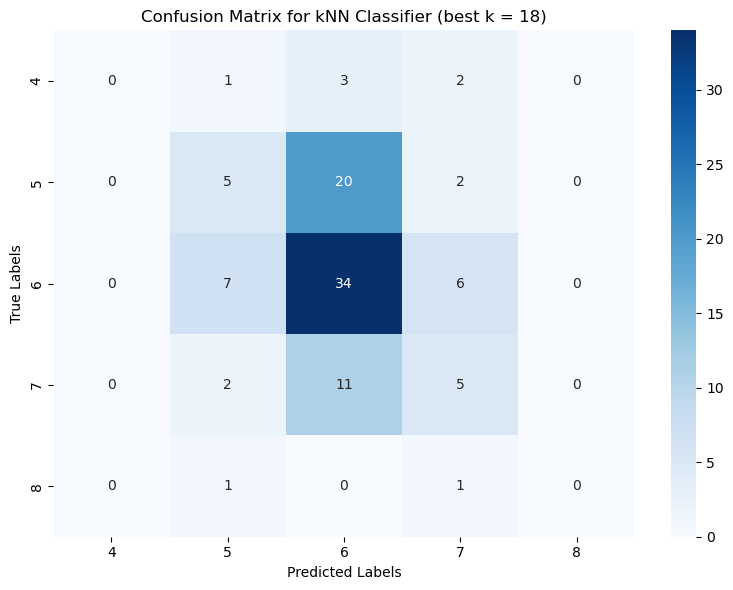

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Define the parameter grid for k (trying values from 1 to 20)
param_grid = {'n_neighbors': list(range(1, 21))}

# Initialize the kNN classifier
knn = KNeighborsClassifier()

stratified_kfold = StratifiedKFold(n_splits=5)

# Use GridSearchCV to search for the best k
grid_search = GridSearchCV(knn, param_grid, cv=stratified_kfold, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

# Re-train the model with the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Evaluate the model
y_pred_best = knn_best.predict(X_test)

# Generate the confusion matrix for the best k
cm_best = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for kNN Classifier (best k = {best_k})')

# Show the plot
plt.tight_layout()
plt.show()

In [86]:
# k = 10, splits = 5
# cross-validation with KFold 
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

# Load the dataset
data = pd.read_csv('s3934367-A2SampleTwo.csv')

# Prepare features (X) and target (y)
X = data2_clean.iloc[:, :-1].values  # All columns except the last one
y = data2_clean['quality'].values  # Target variable

# Initialize the kNN classifier with a chosen k value (e.g., k=5)
knn = KNeighborsClassifier(n_neighbors=10)

# Set up k-fold cross-validation with 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation and calculate accuracy for each fold
cv_scores = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy')

# Output the cross-validation scores for each fold and the mean accuracy
print("Cross-validation scores for each fold: ", cv_scores)
print("Mean cross-validation accuracy: ", cv_scores.mean())

Cross-validation scores for each fold:  [0.38 0.42 0.33 0.42 0.42]
Mean cross-validation accuracy:  0.394


In [87]:
# cross-validation with StratifiedKFold
# k = 10, splits = 5
# Cross-fold validation

from sklearn.model_selection import cross_val_score
# Load the dataset again
data = pd.read_csv('s3934367-A2SampleTwo.csv')

# Prepare features and target variable
X = data.iloc[:, :-1].values  # Features
y = data['quality'].values  # Target (quality)

# Initialize the kNN classifier with k=10
knn_best = KNeighborsClassifier(n_neighbors=10)

# Perform cross-validation using StratifiedKFold to preserve class distribution
stratified_kfold = StratifiedKFold(n_splits=5)

# Calculate cross-validation scores
cv_scores = cross_val_score(knn_best, X, y, cv=stratified_kfold, scoring='accuracy')

# Output the cross-validation scores for each fold and the mean accuracy
print(f"Cross-validation scores for each fold: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.2f}")

Cross-validation scores for each fold: [0.42 0.43 0.43 0.35 0.35]
Mean cross-validation accuracy: 0.40


C:\Users\Ridge\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


## Decision Tree & comparison

Cross-validation scores for each fold: [0.43 0.46 0.36 0.35 0.4 ]
Mean cross-validation accuracy: 0.40

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.29      0.44      0.35        27
           6       0.53      0.40      0.46        47
           7       0.15      0.11      0.13        18
           8       0.00      0.00      0.00         2

    accuracy                           0.33       100
   macro avg       0.16      0.16      0.16       100
weighted avg       0.35      0.33      0.33       100



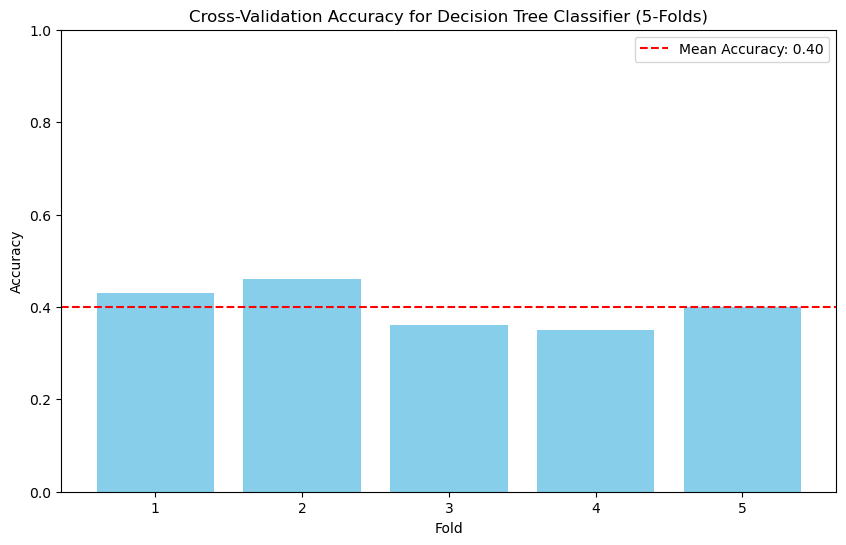

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load the dataset
data2_clean = pd.read_csv('s3934367-A2SampleTwo.csv')

# Prepare features (X) and target (y)
X = data2_clean.iloc[:, :-1].values  # All columns except the last one (which is 'quality')
y = data2_clean['quality'].values  # Target variable

# Initialize Decision Tree Classifier
dtree = DecisionTreeClassifier(
    criterion='gini',  # Default
    max_depth=None,  # No maximum depth
    min_samples_split=5,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples in a leaf node
    random_state=1  # Ensure reproducibility
)

# Prepare K-Fold cross-validation with 5 splits (k = 5)
kFold = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation and calculate accuracy for each fold
cv_scores = cross_val_score(dtree, X, y, cv=kFold, scoring='accuracy')

# Output cross-validation scores for each fold and the mean accuracy
mean_accuracy = cv_scores.mean()
print(f"Cross-validation scores for each fold: {cv_scores}")
print(f"Mean cross-validation accuracy: {mean_accuracy:.2f}")

# Output classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# bar plot:
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), cv_scores, color='skyblue')
plt.axhline(y=mean_accuracy, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2f}')
plt.title('Cross-Validation Accuracy for Decision Tree Classifier (5-Folds)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))
plt.ylim(0, 1)  # Assuming accuracy values range from 0 to 1
plt.legend(loc='best')
plt.show()

# Task 3: Clustering

# setup / imports

In [92]:
A2_filename = 'A2data.csv'
A2 = pd.read_csv(A2_filename, sep=';', decimal='.', header=None, names= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
A2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
2,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
3,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


In [93]:
data3_clean = A2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']].dropna()

In [94]:
data3_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
2,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
3,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


In [95]:
print(data3_clean)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
1                 7              0.27         0.36            20.7      0.045   
2               6.3               0.3         0.34             1.6      0.049   
3               8.1              0.28          0.4             6.9       0.05   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4777            6.2              0.21         0.29             1.6      0.039   
4778            6.6              0.32         0.36               8      0.047   
4779            6.5              0.24         0.19             1.2      0.041   
4780            5.5              0.29          0.3             1.1      0.022   
4781              6              0.21         0.38             0.8       0.02   

      free sulfur dioxide  

In [96]:
A2_sample_data = data3_clean.sample(n=300, random_state=0)

In [97]:
print(A2_sample_data)

     fixed acidity volatile acidity citric acid residual sugar chlorides  \
3543           7.6             0.38        0.28            4.2     0.029   
2076           6.7             0.24        0.33           12.3     0.046   
1384           6.3             0.39        0.24            6.9     0.069   
4153           7.5             0.38        0.56            9.7     0.055   
868            7.4             0.26        0.43              6     0.022   
...            ...              ...         ...            ...       ...   
3824           6.6             0.32        0.26            4.6     0.031   
2912           7.2              0.3         0.3            8.7     0.022   
3958           7.3             0.23        0.41           14.6     0.048   
4710             7             0.17        0.42              1     0.075   
509            5.8             0.36        0.32            1.7     0.033   

     free sulfur dioxide total sulfur dioxide  density    pH sulphates  \
3543         

In [98]:
A2_sample_data.to_csv('s3934367-A2SampleThree.csv', index=False)

In [99]:
data3_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
2,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
3,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


## k-Means 

In [101]:
# PCA Reduced 

C:\Users\Ridge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


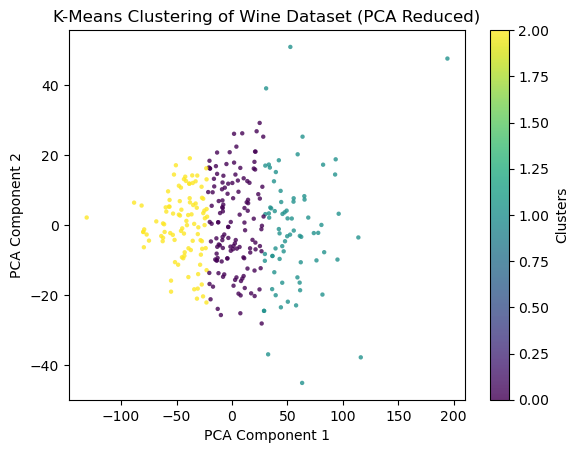

[2 0 2 0 0 2 1 1 2 0 2 0 0 2 1 0 1 1 2 0 0 2 2 2 1 1 0 0 0 0 2 2 1 1 0 2 0
 0 2 2 0 2 2 0 2 1 0 2 2 0 0 0 0 2 0 0 0 2 0 1 2 0 2 0 2 0 0 0 1 2 2 1 2 0
 2 0 1 0 1 0 1 0 2 0 2 1 2 1 1 0 2 0 2 2 2 1 2 1 2 1 2 0 1 0 1 1 0 0 2 0 1
 2 0 2 0 1 2 2 0 1 1 2 2 0 0 2 2 0 0 1 2 2 0 2 2 1 0 0 0 2 0 2 0 1 0 0 2 1
 2 0 2 2 1 0 1 2 0 0 1 0 2 0 0 2 1 0 2 0 1 1 2 0 0 0 1 2 2 0 2 0 2 0 1 0 1
 0 0 1 2 1 2 0 0 2 0 0 0 2 0 0 0 0 0 0 1 0 2 0 2 0 2 2 2 2 1 0 2 2 0 0 1 0
 1 0 0 1 1 2 2 0 0 0 2 2 2 0 1 1 0 0 0 1 0 0 0 1 1 0 2 1 2 0 1 1 2 1 0 0 0
 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 2 1 0 0 2 0 2 0 0 2 0 2 2 1 0 1 0
 2 1 2 2]
Cluster  Quality
0        6          61
         5          32
         7          29
         8           5
         4           3
         3           1
1        6          33
         5          29
         7           6
         4           4
         8           1
2        6          50
         7          23
         5          11
         4          10
         8           2
Name:

In [102]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('s3934367-A2SampleThree.csv')

# Prepare features (X) and target (y)
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 
          'sulphates', 'alcohol']].values  # These are all the features
y = data['quality'].values  # Quality is the target variable (excluded from clustering)

# Initialize the KMeans algorithm with a chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the feature data
kmeans.fit(X)

# Get the cluster labels assigned by KMeans
labels = kmeans.labels_

# Reduce dimensions using PCA for visualization
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot the clusters based on the reduced PCA components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10, lw=0, alpha=0.8)
plt.title("K-Means Clustering of Wine Dataset (PCA Reduced)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Clusters')
plt.show()

# Output the labels from KMeans
print(labels)

# Analyze the relationship between clusters and the quality variable
cluster_quality = pd.DataFrame({'Cluster': labels, 'Quality': y})
print(cluster_quality.groupby('Cluster')['Quality'].value_counts())


## DBSCAN & comparison 

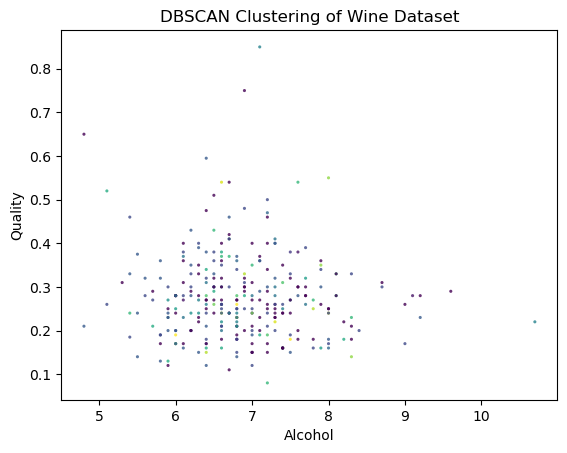

[ 0  1  4  2  3 14 -1 -1  4  3 -1  5  6  4  6  3 -1  7  3  3 -1  4 -1  4
 -1 -1 -1  8  9 -1  0  4 -1 -1 -1  3  3  3 -1  4  3  4  4  6 10 -1 15 10
  4  3  3  3  3  4  3  3  3  4 11 -1  4 12  3  3  3 11  5 -1 -1  4 10 -1
  4  5 13  3 -1  3 16  3  6  3 10 -1  4 -1  4 -1 -1 -1 10 12  4  4  4 -1
  4 -1 10 -1 14 -1 -1  3  7  6 -1  3 13  3 -1 10  8 -1 -1  7 -1  4  3 -1
  7  4  4 11 11  4  4  3  8  7  3  4 -1  4 -1 -1  3  3 -1  4 11 -1  1 -1
  3  3 -1 -1  4  3  3 -1 -1 -1  7 10 -1  3 -1 -1  4  3  3 -1 -1 11 -1 11
  2 -1  3 15 15 11 -1  4 10  3  0 17 10 -1 16  6 16 -1 -1  2  4  7 -1  3
 -1 -1  3  3 -1 -1  3  3  6 -1  3 15 -1  3  4  3  4 17 -1 10  3 10  6 17
 10 -1 -1 11  7  3 -1  3  3 -1 -1 -1  4 -1  1 -1  4 14 -1 -1 -1 -1 -1  9
 11 -1  3 -1  9 -1 -1 11  4 -1  4  3 -1 -1  4  6  1  9 -1 -1 -1  7 -1 12
  6 -1 -1  3 -1 -1  6 -1 -1  9 -1 -1  5  3  8  4 16 -1  3 13 -1 -1  6  3
  4 12  3 -1 -1 -1 -1 -1  4 -1 -1  4]
Cluster  Quality
-1       6          50
         5          30
         7          15


In [104]:
# DBSCAN 
# eps = 6, min-samples = 3
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('s3934367-A2SampleThree.csv')

# Prepare features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except 'quality'
# X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
          # 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 
          # 'sulphates', 'alcohol']].values
y = data['quality'].values  # Quality is the target variable

# Initialize DBSCAN with a specific eps and min_samples value
dbs = DBSCAN(eps=6, min_samples=3)

# Fit DBSCAN to the feature data
labels = dbs.fit_predict(X)

# Plot the first two features with DBSCAN cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5.0, lw=0, alpha=0.8)
plt.title("DBSCAN Clustering of Wine Dataset")
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

# Fit DBSCAN to the feature data
labels_1 = dbs.fit(X).labels_

print(labels_1)

# Analyze the relationship between clusters and the quality variable
cluster_quality = pd.DataFrame({'Cluster': labels, 'Quality': y})
print(cluster_quality.groupby('Cluster')['Quality'].value_counts())


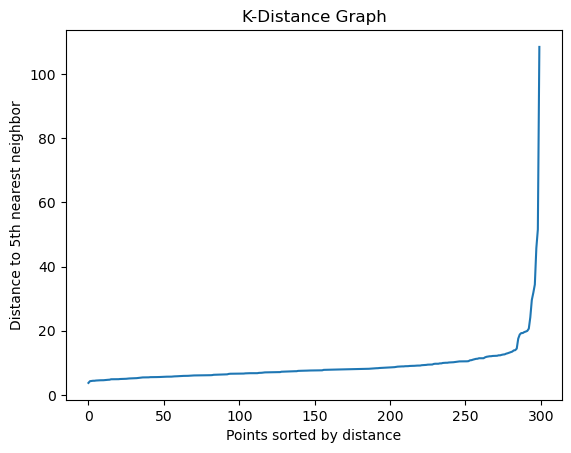

In [105]:
# K-Distance 

from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Load data from spreadsheet
X = data.iloc[:, :-1].values

# Fit NearestNeighbors model to calculate k-distances
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort the distances to create the k-distance plot
distances = np.sort(distances[:, 4], axis=0)  # Distances to the 5th nearest neighbor
plt.plot(distances)
plt.title("K-Distance Graph")
plt.ylabel("Distance to 5th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.show()
# Shown

# eps value graph (similar to k-means graph) 

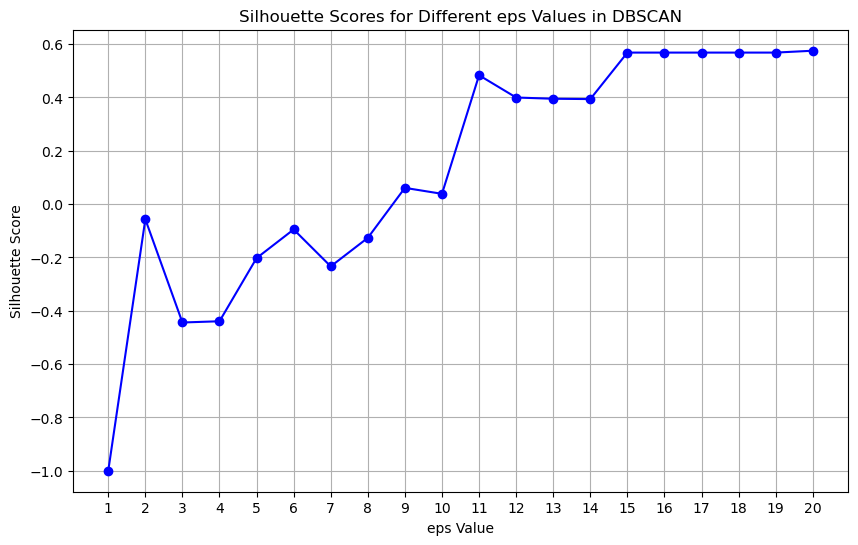

In [107]:
# Let's generate a plot to display the performance of DBSCAN across different eps values (1 to 20).
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('s3934367-A2SampleThree.csv')

# Prepare features (X)
X = data.iloc[:, :-1].values  # All columns except 'quality'

# Initialize list to store silhouette scores
eps_values = range(1, 21)
silhouette_scores = []

# Loop through each eps value and compute DBSCAN clustering and silhouette score
for eps in eps_values:
    dbs = DBSCAN(eps=eps, min_samples=3)
    labels = dbs.fit_predict(X)
    
    # Ignore silhouette score for a single cluster case
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)  # Invalid case (only one cluster)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different eps Values in DBSCAN')
plt.xlabel('eps Value')
plt.ylabel('Silhouette Score')
plt.xticks(eps_values)
plt.grid(True)
plt.show()


# Shown Together (k-means + DBSCAN) 

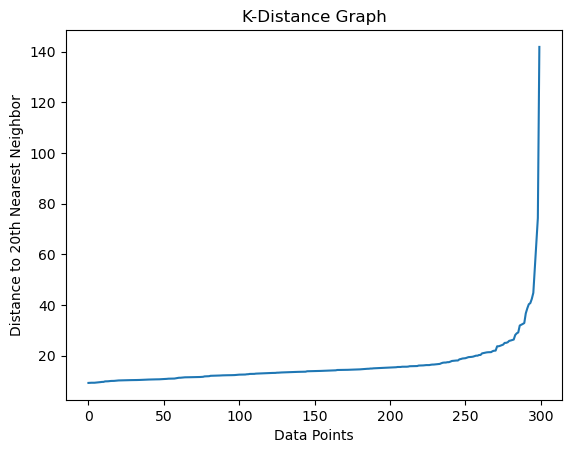

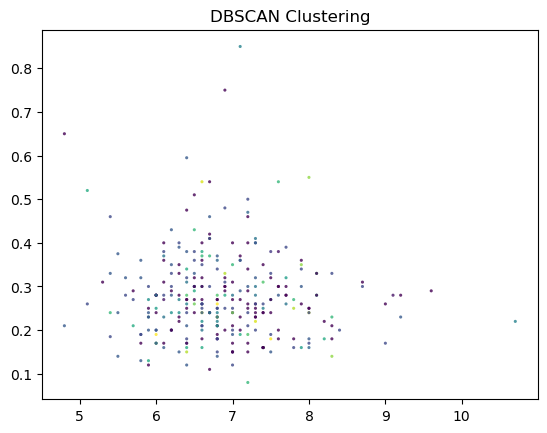

In [109]:
# Shown Together (k-means + DBSCAN) 

# Exclude the target column (e.g., 'quality') from X
X = data.iloc[:, :-1].values  # Use all columns except the last one (assumed to be 'quality')

# Now, use NearestNeighbors with the corrected feature matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Fit NearestNeighbors model
nbrs = NearestNeighbors().fit(X)

# Calculate distances and indices for the 20 nearest neighbors
distances, indices = nbrs.kneighbors(X, 20)

# Sort distances for k-distance plot
kDis = distances[:, -1]
kDis.sort()

# Plot k-distance graph
plt.plot(kDis)
plt.title("K-Distance Graph")
plt.xlabel("Data Points")
plt.ylabel("Distance to 20th Nearest Neighbor")
plt.show()

# Now run DBSCAN with your eps value based on the k-distance graph
from sklearn.cluster import DBSCAN
    
# Apply DBSCAN
dbs_1 = DBSCAN(eps=6, min_samples=3)
labels_1 = dbs_1.fit(X).labels_

# Plot DBSCAN clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels_1, alpha=0.8, s=5.0, lw=0)
plt.title("DBSCAN Clustering")
plt.xlabel('')
plt.ylabel('')
plt.show()


## eps = 20

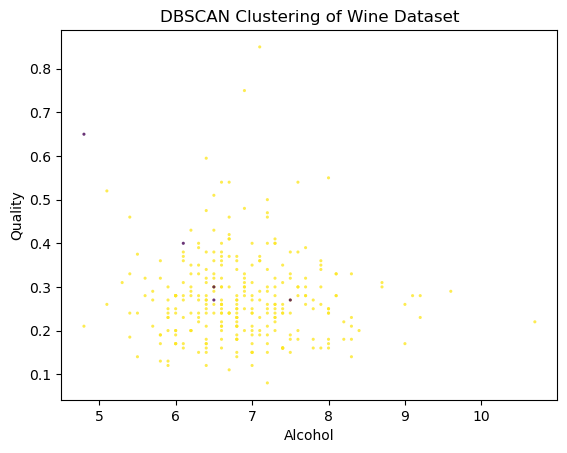

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
Cluster  Quality
-1       5            3
         4            1
         6           

In [111]:
# DBSCAN, eps = 20 min-samples = 3

from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('s3934367-A2SampleThree.csv')

# Prepare features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except 'quality'
# X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
          # 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 
          # 'sulphates', 'alcohol']].values
y = data['quality'].values  # Quality is the target variable

# Initialize DBSCAN with a specific eps and min_samples value
dbs = DBSCAN(eps=20, min_samples=3)

# Fit DBSCAN to the feature data
labels = dbs.fit_predict(X)

# Plot the first two features with DBSCAN cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5.0, lw=0, alpha=0.8)
plt.title("DBSCAN Clustering of Wine Dataset")
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

# Fit DBSCAN to the feature data
labels_1 = dbs.fit(X).labels_

print(labels_1)

# Analyze the relationship between clusters and the quality variable
cluster_quality = pd.DataFrame({'Cluster': labels, 'Quality': y})
print(cluster_quality.groupby('Cluster')['Quality'].value_counts())


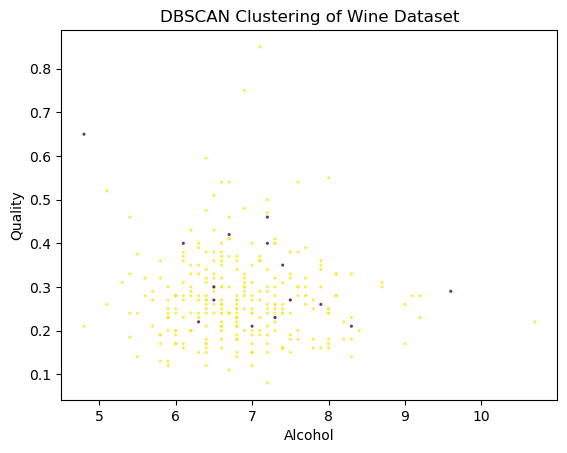

[ 0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0 -1  0  0]
Cluster  Quality
-1       5            6
         6            6
         4           

In [112]:
# DBSCAN, eps = 11 min-samples = 3

from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('s3934367-A2SampleThree.csv')

# Prepare features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except 'quality'
# X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
          # 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 
          # 'sulphates', 'alcohol']].values
y = data['quality'].values  # Quality is the target variable

# Initialize DBSCAN with a specific eps and min_samples value
dbs = DBSCAN(eps=11, min_samples=3)

# Fit DBSCAN to the feature data
labels = dbs.fit_predict(X)

# Plot the first two features with DBSCAN cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5.0, lw=0, alpha=0.8)
plt.title("DBSCAN Clustering of Wine Dataset")
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

# Fit DBSCAN to the feature data
labels_1 = dbs.fit(X).labels_

print(labels_1)

# Analyze the relationship between clusters and the quality variable
cluster_quality = pd.DataFrame({'Cluster': labels, 'Quality': y})
print(cluster_quality.groupby('Cluster')['Quality'].value_counts())
